# Многоклассовая классификация цветов


# Цель
Реализовать классификацию сортов растения ирис (Iris Setosa - 0, Iris Versicolour - 1, Iris Virginica - 2) по четырем признакам: размерам пестиков и тычинок его цветков.

# Задачи

* Ознакомиться с задачей классификации
* Загрузить данные
* Создать модель ИНС
* Настроить параметры обучения
* Обучить и оценить модель



# Выполнение работы


### Подключение модулей

In [1]:
import pandas
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

### Загрузка данных

Чтение данных из базы

In [2]:
dataframe = pandas.read_csv("iris.csv", header=None)

Примерный вид базы

In [3]:
dataframe.head() #по дефолту 4

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Создаем копию массива с Numpy-представление

In [4]:
dataset = dataframe.values 

X = dataset[:,0:4].astype(float) #переводим в нужный формат
Y = dataset[:,4]

### Переход от текстовых меток к категориальному вектору

In [5]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = to_categorical(encoded_Y)

### Создание модели нейронной сети

Определим последовательность модели нейронной сети (от меньшего к большему)

In [6]:
model = Sequential()

Добавление слоя модели с использованием функции активации ReLu (возвращает значение х, если х положительно, иначе 0)

In [7]:
model.add(Dense(4, activation='relu'))

Добавление слоя модели с использованием функции активации softmax (преобразует вектор чисел в вектор вероятностей, где вероятности каждого значения пропорциональны относительному масштабу каждого значения в векторе)

In [8]:
model.add(Dense(3, activation='softmax'))

### Добавим параметров к обчению

1. оптимизатор — механизм, с помощью которого сеть будет обновлять себя, опираясь на наблюдаемые данные и функцию потерь;
2. функцию потерь, которая определяет, как сеть должна оценивать качество своей работы на обучающих
3. метрики для мониторинга на этапах обучения и тестирования — здесь нас будет интересовать только точность (доля правильно классифицированных изображений)

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

### Добавим адаптации модели под обучающие данные

In [10]:
d = model.fit(X, dummy_y, epochs=75, batch_size=10,
validation_split=0.1)

Epoch 1/75
14/14 [==============================] - 2s 25ms/step - loss: 4.1612 - accuracy: 0.2593 - val_loss: 0.4864 - val_accuracy: 1.0000
Epoch 2/75
14/14 [==============================] - 0s 8ms/step - loss: 3.7522 - accuracy: 0.2148 - val_loss: 0.7358 - val_accuracy: 0.1333
Epoch 3/75
14/14 [==============================] - 0s 7ms/step - loss: 3.4368 - accuracy: 0.0074 - val_loss: 0.9017 - val_accuracy: 0.0000e+00
Epoch 4/75
14/14 [==============================] - 0s 7ms/step - loss: 3.1692 - accuracy: 0.0000e+00 - val_loss: 1.0293 - val_accuracy: 0.0000e+00
Epoch 5/75
14/14 [==============================] - 0s 7ms/step - loss: 2.9368 - accuracy: 0.0000e+00 - val_loss: 1.0207 - val_accuracy: 0.0000e+00
Epoch 6/75
14/14 [==============================] - 0s 7ms/step - loss: 2.7193 - accuracy: 0.0000e+00 - val_loss: 0.9853 - val_accuracy: 0.0000e+00
Epoch 7/75
14/14 [==============================] - 0s 7ms/step - loss: 2.5294 - accuracy: 0.0000e+00 - val_loss: 0.9852 - val_accu

Epoch 59/75
14/14 [==============================] - 0s 8ms/step - loss: 0.5905 - accuracy: 0.9407 - val_loss: 0.5906 - val_accuracy: 1.0000
Epoch 60/75
14/14 [==============================] - 0s 9ms/step - loss: 0.5844 - accuracy: 0.9407 - val_loss: 0.6622 - val_accuracy: 0.7333
Epoch 61/75
14/14 [==============================] - 0s 8ms/step - loss: 0.5753 - accuracy: 0.9333 - val_loss: 0.6190 - val_accuracy: 0.8667
Epoch 62/75
14/14 [==============================] - 0s 8ms/step - loss: 0.5678 - accuracy: 0.9481 - val_loss: 0.6088 - val_accuracy: 0.8667
Epoch 63/75
14/14 [==============================] - 0s 8ms/step - loss: 0.5612 - accuracy: 0.9407 - val_loss: 0.6228 - val_accuracy: 0.8667
Epoch 64/75
14/14 [==============================] - 0s 8ms/step - loss: 0.5542 - accuracy: 0.9481 - val_loss: 0.6199 - val_accuracy: 0.8667
Epoch 65/75
14/14 [==============================] - 0s 8ms/step - loss: 0.5481 - accuracy: 0.9407 - val_loss: 0.6092 - val_accuracy: 0.8667
Epoch 66/75
1

Соберем данные нужные для построения графика 

In [11]:
y10 = d.history["loss"]
y20 = d.history["accuracy"]

### Выполнение дополнительных требований для для изучения

Создадим точно такую же модель нейроной сети, но изменим количество слоев, и изменем параметры обучения, а именно количество эпох и количество значений за раз

In [ ]:
model1 = Sequential()

model1.add(Dense(4, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(3, activation='softmax'))

model1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

d2 = model1.fit(X, dummy_y, epochs=101, batch_size=20, validation_split=0.1)

Epoch 1/101
7/7 [==============================] - 1s 40ms/step - loss: 1.1466 - accuracy: 0.3185 - val_loss: 1.1471 - val_accuracy: 0.0000e+00
Epoch 2/101
7/7 [==============================] - 0s 13ms/step - loss: 1.1150 - accuracy: 0.3704 - val_loss: 1.1517 - val_accuracy: 0.0000e+00
Epoch 3/101
7/7 [==============================] - 0s 13ms/step - loss: 1.0858 - accuracy: 0.3704 - val_loss: 1.1317 - val_accuracy: 0.0000e+00
Epoch 4/101
7/7 [==============================] - 0s 13ms/step - loss: 1.0546 - accuracy: 0.3704 - val_loss: 1.0879 - val_accuracy: 0.0000e+00
Epoch 5/101
7/7 [==============================] - 0s 12ms/step - loss: 1.0417 - accuracy: 0.3704 - val_loss: 1.0604 - val_accuracy: 0.0000e+00
Epoch 6/101
7/7 [==============================] - 0s 13ms/step - loss: 1.0300 - accuracy: 0.3704 - val_loss: 1.0498 - val_accuracy: 0.0000e+00
Epoch 7/101
7/7 [==============================] - 0s 13ms/step - loss: 1.0161 - accuracy: 0.4296 - val_loss: 1.0533 - val_accuracy: 0.0

Отрисуем получившиеся значения

In [25]:
y11 = d2.history["loss"]
y21 = d2.history["accuracy"]

При увеличение колличества слоев увеличилась точность.

Проведем третью проверку. Возьмем первую модель и увеличим количество эпох.

In [18]:
model2 = Sequential()

model2.add(Dense(4, activation='relu'))

model2.add(Dense(3, activation='softmax'))

model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

d3 = model2.fit(X, dummy_y, epochs=200, batch_size=10, validation_split=0.1)

Epoch 1/200
14/14 [==============================] - 1s 22ms/step - loss: 1.4434 - accuracy: 0.2815 - val_loss: 0.7186 - val_accuracy: 1.0000
Epoch 2/200
14/14 [==============================] - 0s 9ms/step - loss: 1.3580 - accuracy: 0.2815 - val_loss: 0.6972 - val_accuracy: 1.0000
Epoch 3/200
14/14 [==============================] - 0s 8ms/step - loss: 1.2882 - accuracy: 0.2741 - val_loss: 0.6881 - val_accuracy: 1.0000
Epoch 4/200
14/14 [==============================] - 0s 10ms/step - loss: 1.2215 - accuracy: 0.2741 - val_loss: 0.6696 - val_accuracy: 1.0000
Epoch 5/200
14/14 [==============================] - 0s 12ms/step - loss: 1.1599 - accuracy: 0.2593 - val_loss: 0.6539 - val_accuracy: 1.0000
Epoch 6/200
14/14 [==============================] - 0s 10ms/step - loss: 1.1040 - accuracy: 0.2593 - val_loss: 0.6510 - val_accuracy: 1.0000
Epoch 7/200
14/14 [==============================] - 0s 10ms/step - loss: 1.0187 - accuracy: 0.2667 - val_loss: 0.6348 - val_accuracy: 1.0000
Epoch 8/

14/14 [==============================] - 0s 9ms/step - loss: 0.3771 - accuracy: 0.9333 - val_loss: 0.7067 - val_accuracy: 0.6000
Epoch 59/200
14/14 [==============================] - 0s 8ms/step - loss: 0.3744 - accuracy: 0.9481 - val_loss: 0.7035 - val_accuracy: 0.6000
Epoch 60/200
14/14 [==============================] - 0s 8ms/step - loss: 0.3738 - accuracy: 0.9556 - val_loss: 0.6560 - val_accuracy: 0.6667
Epoch 61/200
14/14 [==============================] - 0s 8ms/step - loss: 0.3678 - accuracy: 0.9556 - val_loss: 0.6991 - val_accuracy: 0.6000
Epoch 62/200
14/14 [==============================] - 0s 8ms/step - loss: 0.3649 - accuracy: 0.9407 - val_loss: 0.7123 - val_accuracy: 0.6000
Epoch 63/200
14/14 [==============================] - 0s 8ms/step - loss: 0.3631 - accuracy: 0.9333 - val_loss: 0.7376 - val_accuracy: 0.4667
Epoch 64/200
14/14 [==============================] - 0s 8ms/step - loss: 0.3601 - accuracy: 0.9333 - val_loss: 0.6975 - val_accuracy: 0.6000
Epoch 65/200
14/14 

14/14 [==============================] - 0s 8ms/step - loss: 0.2303 - accuracy: 0.9630 - val_loss: 0.5421 - val_accuracy: 0.7333
Epoch 116/200
14/14 [==============================] - 0s 8ms/step - loss: 0.2279 - accuracy: 0.9630 - val_loss: 0.4877 - val_accuracy: 0.8667
Epoch 117/200
14/14 [==============================] - 0s 8ms/step - loss: 0.2263 - accuracy: 0.9630 - val_loss: 0.5206 - val_accuracy: 0.7333
Epoch 118/200
14/14 [==============================] - 0s 8ms/step - loss: 0.2272 - accuracy: 0.9630 - val_loss: 0.4609 - val_accuracy: 0.8667
Epoch 119/200
14/14 [==============================] - 0s 8ms/step - loss: 0.2243 - accuracy: 0.9630 - val_loss: 0.5427 - val_accuracy: 0.7333
Epoch 120/200
14/14 [==============================] - 0s 9ms/step - loss: 0.2198 - accuracy: 0.9630 - val_loss: 0.4907 - val_accuracy: 0.8667
Epoch 121/200
14/14 [==============================] - 0s 9ms/step - loss: 0.2180 - accuracy: 0.9630 - val_loss: 0.4745 - val_accuracy: 0.8667
Epoch 122/200

14/14 [==============================] - 0s 8ms/step - loss: 0.1505 - accuracy: 0.9630 - val_loss: 0.3712 - val_accuracy: 0.8667
Epoch 173/200
14/14 [==============================] - 0s 8ms/step - loss: 0.1486 - accuracy: 0.9630 - val_loss: 0.3630 - val_accuracy: 0.8667
Epoch 174/200
14/14 [==============================] - 0s 8ms/step - loss: 0.1483 - accuracy: 0.9704 - val_loss: 0.3197 - val_accuracy: 0.9333
Epoch 175/200
14/14 [==============================] - 0s 8ms/step - loss: 0.1470 - accuracy: 0.9778 - val_loss: 0.3376 - val_accuracy: 0.8667
Epoch 176/200
14/14 [==============================] - 0s 8ms/step - loss: 0.1457 - accuracy: 0.9778 - val_loss: 0.3309 - val_accuracy: 0.8667
Epoch 177/200
14/14 [==============================] - 0s 8ms/step - loss: 0.1447 - accuracy: 0.9778 - val_loss: 0.3406 - val_accuracy: 0.8667
Epoch 178/200
14/14 [==============================] - 0s 9ms/step - loss: 0.1441 - accuracy: 0.9704 - val_loss: 0.3606 - val_accuracy: 0.8667
Epoch 179/200

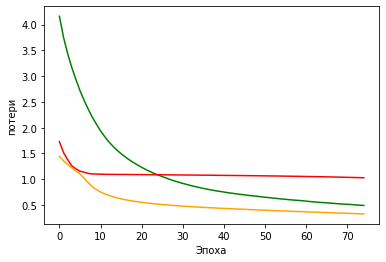

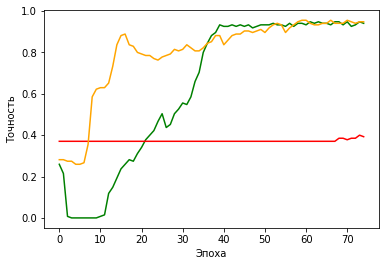

In [29]:
y12 = d3.history["loss"] 
y22 = d3.history["accuracy"]

x = [x for x in range(75)]
plt.ylabel("потери")
plt.xlabel("Эпоха")
plt.plot(x, y10, 'green', x, y11[:75], 'red', x, y12[:75], 'orange')

plt.show()
plt.ylabel("Точность")
plt.xlabel("Эпоха")
plt.plot(x, y20, "green", x, y21[:75], "red", x, y22[:75], "orange")
plt.show()

При увеличение колличество эпох повысилась точность, но при этом нейронаня сеть не предсказывает, а угадывает, что не правильно. Так же при больше обьеме данных, может потребоваться больше ресурсов для выполнениея задачи. Поэтому стоит искать оптимальное значение эпох и сколько береться данных за раз. 